In [23]:
import pandas as pd

# Read CSV file
df = pd.read_csv("california_housing_test.csv")

# Show the first 5 lines
print(df.head())

# General information
print(df.info())

# Basic statistics
print(df.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------     

In [24]:
average_income = df["median_income"].mean()
print(f"Ortalama Medyan Gelir: {average_income:.6f}")

Ortalama Medyan Gelir: 3.807272


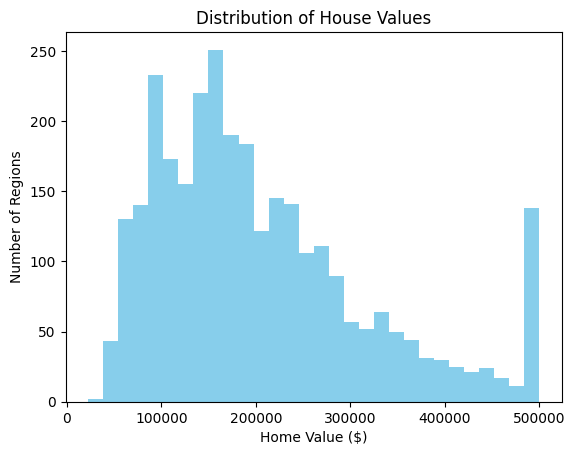

In [25]:
import matplotlib.pyplot as plt

plt.hist(df["median_house_value"], bins=30, color="skyblue")
plt.title("Distribution of House Values")
plt.xlabel("Home Value ($)")
plt.ylabel("Number of Regions")
plt.show()

Dataset Shape: (3000, 9)

Missing Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Descriptive Statistics:
          longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000  

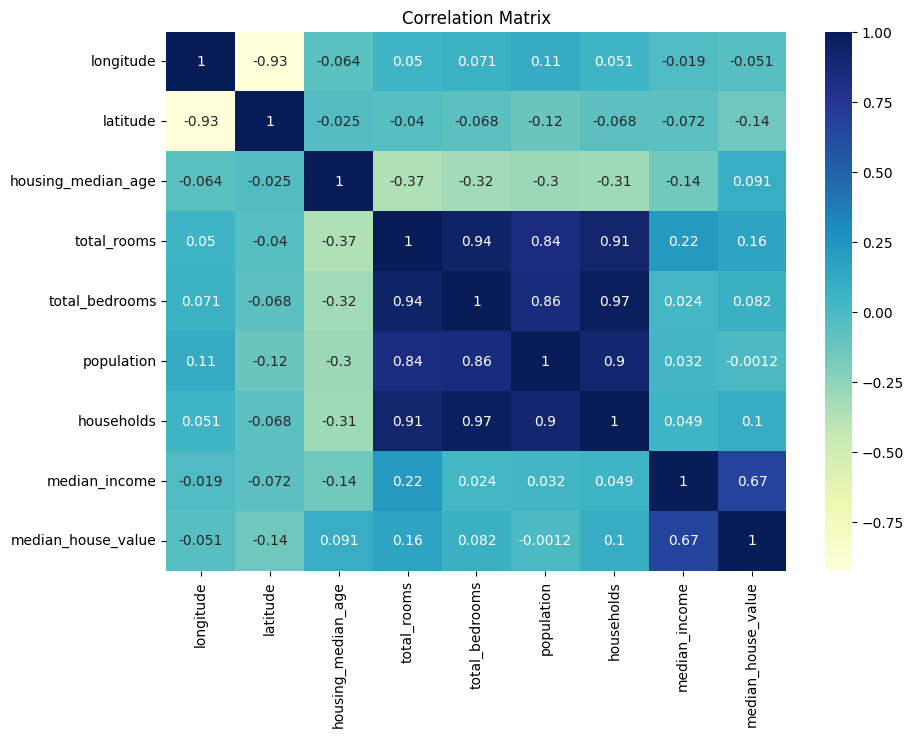

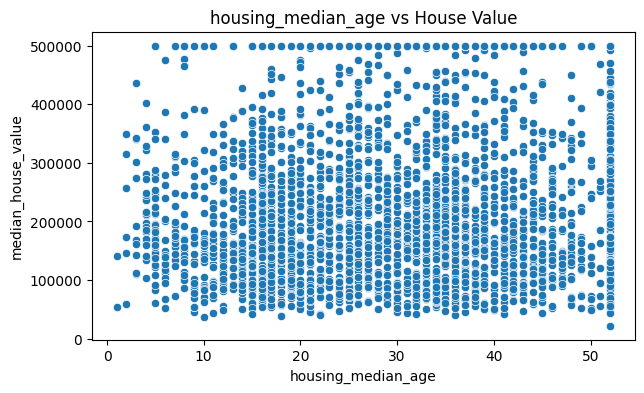

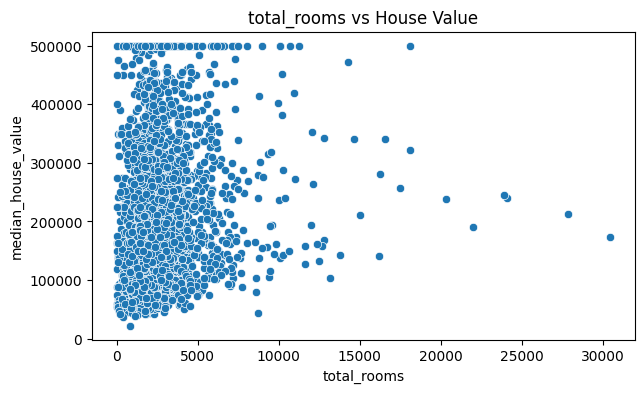

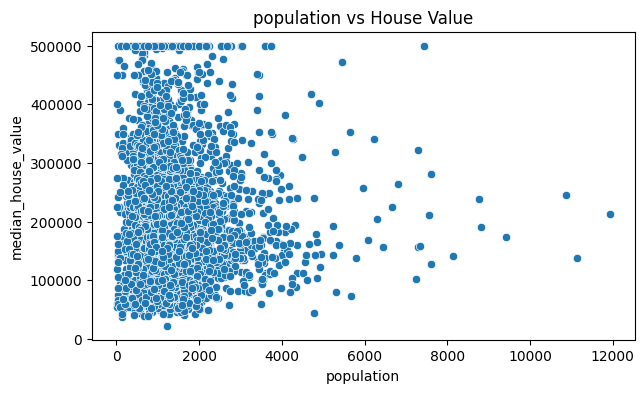

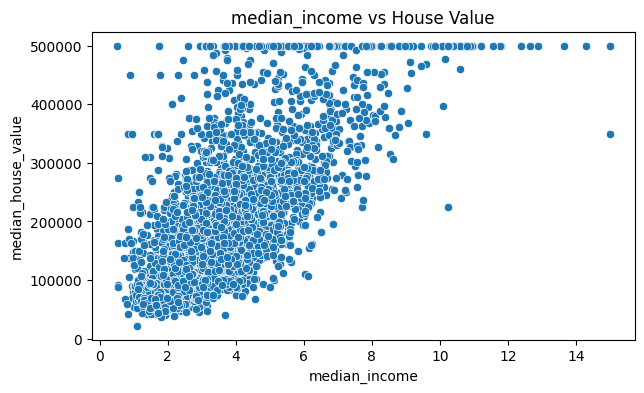

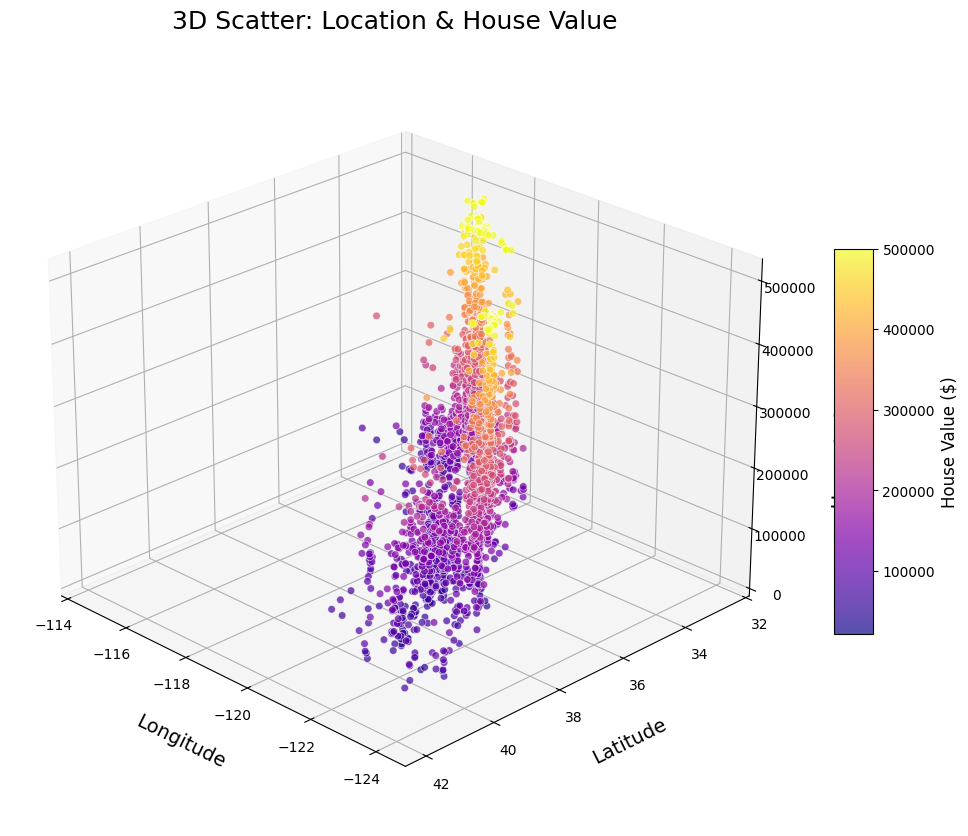

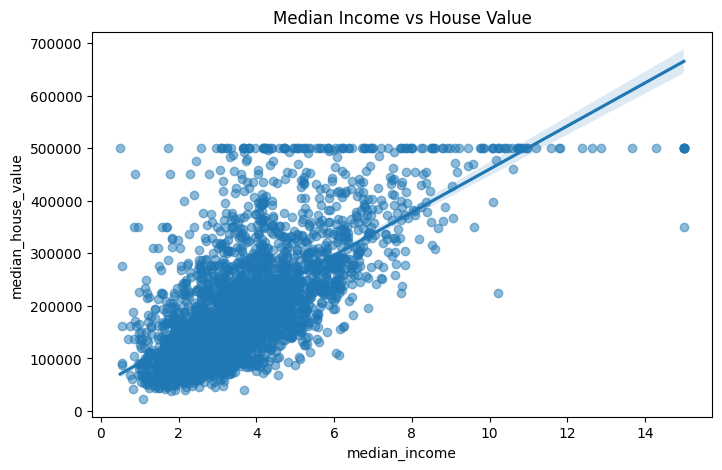

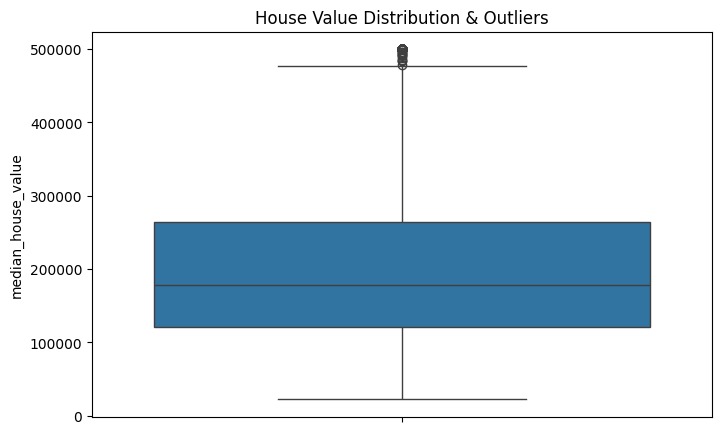

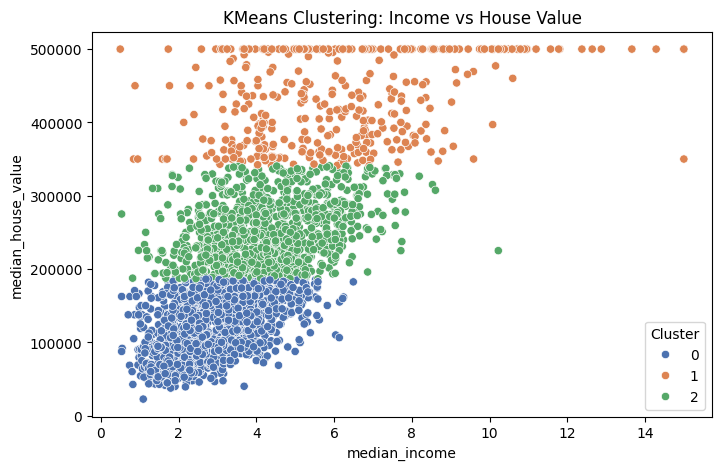


Linear Regression MSE: 7044092097.96
R2 Score: 0.44


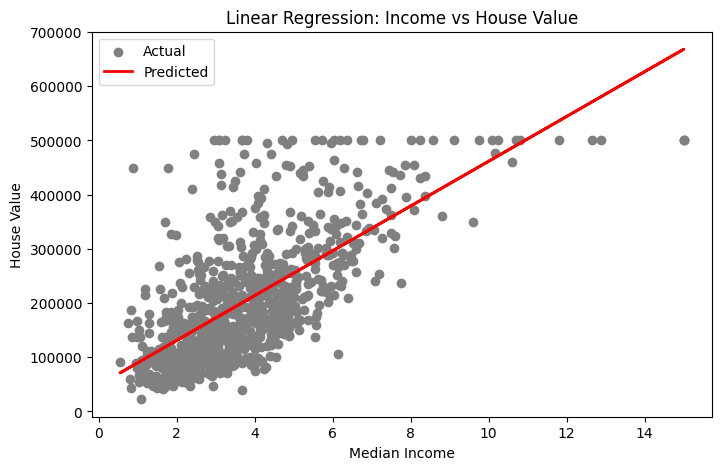

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("california_housing_test.csv")

# Dataset Info & Missing Values
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Correlation Matrix (Heatmap)
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Scatterplots: Key Variables vs House Value
cols = ['housing_median_age', 'total_rooms', 'population', 'median_income']
for col in cols:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y="median_house_value")
    plt.title(f"{col} vs House Value")
    plt.show()

# ✅ Improved 3D Scatter Plot: Location & House Value
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
scatter = ax.scatter(
    df['longitude'], df['latitude'], df['median_house_value'],
    c=df['median_house_value'], cmap='plasma',
    s=30, alpha=0.7, edgecolors='w', linewidth=0.5
)

# Colorbar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('House Value ($)', fontsize=12)

# Axes labels and font sizes
ax.set_xlabel("Longitude", fontsize=14, labelpad=15)
ax.set_ylabel("Latitude", fontsize=14, labelpad=15)
ax.set_zlabel("House Value ($)", fontsize=14, labelpad=15)

# Grid and view angle
ax.grid(True)
ax.view_init(elev=25, azim=135)  # elev = yukseklik, azim = döndürme açısı

# Title
plt.title("3D Scatter: Location & House Value", fontsize=18, pad=20)
plt.show()

# Regression Plot: Income vs House Value
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="median_income", y="median_house_value", scatter_kws={'alpha':0.5})
plt.title("Median Income vs House Value")
plt.show()

# Boxplot: House Value Outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y="median_house_value")
plt.title("House Value Distribution & Outliers")
plt.show()

# KMeans Clustering (on Income & House Value)
kmeans_data = df[['median_income', 'median_house_value']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(kmeans_data)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="median_income", y="median_house_value", hue="Cluster", palette="deep")
plt.title("KMeans Clustering: Income vs House Value")
plt.show()

# Linear Regression Prediction
X = df[['median_income']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Regression Line Plot
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='gray', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Linear Regression: Income vs House Value")
plt.legend()
plt.show()